<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from flask import Flask, render_template
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
import base64

In [2]:
app = Flask(__name__)

In [3]:
app

<Flask '__main__'>

In [4]:
print(pd.__version__)

1.1.0


In [5]:
playstore = pd.read_csv('data/googleplaystore.csv')

In [6]:
playstore.shape

(10841, 13)

In [7]:
playstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [8]:
playstore.drop_duplicates(subset = "App", keep = "first", inplace = True)

In [9]:
playstore.Category = playstore['Category'].astype('category')
playstore.dtypes

App                 object
Category          category
Rating             float64
Reviews             object
Size                object
Installs            object
Type                object
Price               object
Content Rating      object
Genres              object
Last Updated        object
Current Ver         object
Android Ver         object
dtype: object

In [10]:
playstore.drop([10472], inplace=True)

In [11]:
playstore.Installs = playstore['Installs'].apply(lambda x: x.replace("+",""))
playstore.Installs = playstore['Installs'].apply(lambda x: x.replace(",",""))


In [12]:
playstore.Installs = playstore["Installs"].astype('int64')

In [13]:
playstore['Size'].replace('Varies with device', np.nan, inplace = True ) 
playstore.Size = (playstore.Size.replace(r'[kM]+$', '', regex=True).astype(float) * \
             playstore.Size.str.extract(r'[\d\.]+([kM]+)', expand=False)
            .fillna(1)
            .replace(['k','M'], [10**3, 10**6]).astype(int))
playstore['Size'].fillna(playstore.groupby('Category')['Size'].transform('mean'),inplace = True)

In [14]:
playstore.Price = playstore['Price'].apply(lambda x: x.replace("$",""))

In [15]:
playstore.Price = playstore['Price'].astype('float')

In [16]:
playstore[['Reviews','Size', 'Installs']]=playstore[['Reviews','Size', 'Installs']].astype('int64')

In [17]:
df2 = playstore.copy()  

In [18]:
top_category = pd.crosstab(index=df2['Category'],
    columns='Jumlah',
    values=df2['Reviews'],
    aggfunc='count').\
sort_values(by = 'Jumlah', ascending=False).\
reset_index()


In [19]:
top_category.head(11)

col_0,Category,Jumlah
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


In [20]:
top_category.loc[0:0,['Category']]

col_0,Category
0,FAMILY


In [21]:
top_category.loc[0:0,['Jumlah']]

col_0,Jumlah
0,1832


In [22]:
rev_table = df2.groupby('App').sum().sort_values(by = 'Reviews', ascending = False).head(10).reset_index()

In [23]:
rev_table

,App,Rating,Reviews,Size,Installs,Price
0,Facebook,4.1,78158306,15984089,1000000000,0.0
1,WhatsApp Messenger,4.4,69119316,11307429,1000000000,0.0
2,Instagram,4.5,66577313,15984089,1000000000,0.0
3,Messenger – Text and Video Chat for Free,4.0,56642847,11307429,1000000000,0.0
4,Clash of Clans,4.6,44891723,98000000,100000000,0.0
5,Clean Master- Space Cleaner & Antivirus,4.7,42916526,8782837,500000000,0.0
6,Subway Surfers,4.5,27722264,76000000,1000000000,0.0
7,YouTube,4.3,25655305,15792755,1000000000,0.0
8,"Security Master - Antivirus, VPN, AppLock, Boo...",4.7,24900999,8782837,500000000,0.0
9,Clash Royale,4.6,23133508,97000000,100000000,0.0


In [24]:
df2.groupby(['Category','App']).sum().loc[:,['Reviews','Rating']].sort_values(by = 'Reviews', ascending = False).head(10).reset_index()

,Category,App,Reviews,Rating
0,SOCIAL,Facebook,78158306.0,4.1
1,COMMUNICATION,WhatsApp Messenger,69119316.0,4.4
2,SOCIAL,Instagram,66577313.0,4.5
3,COMMUNICATION,Messenger – Text and Video Chat for Free,56642847.0,4.0
4,GAME,Clash of Clans,44891723.0,4.6
5,TOOLS,Clean Master- Space Cleaner & Antivirus,42916526.0,4.7
6,GAME,Subway Surfers,27722264.0,4.5
7,VIDEO_PLAYERS,YouTube,25655305.0,4.3
8,TOOLS,"Security Master - Antivirus, VPN, AppLock, Boo...",24900999.0,4.7
9,GAME,Clash Royale,23133508.0,4.6


<ipython-input-25-a92b45e8a78a>:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(X,Y, color=my_colors)


<BarContainer object of 5 artists>

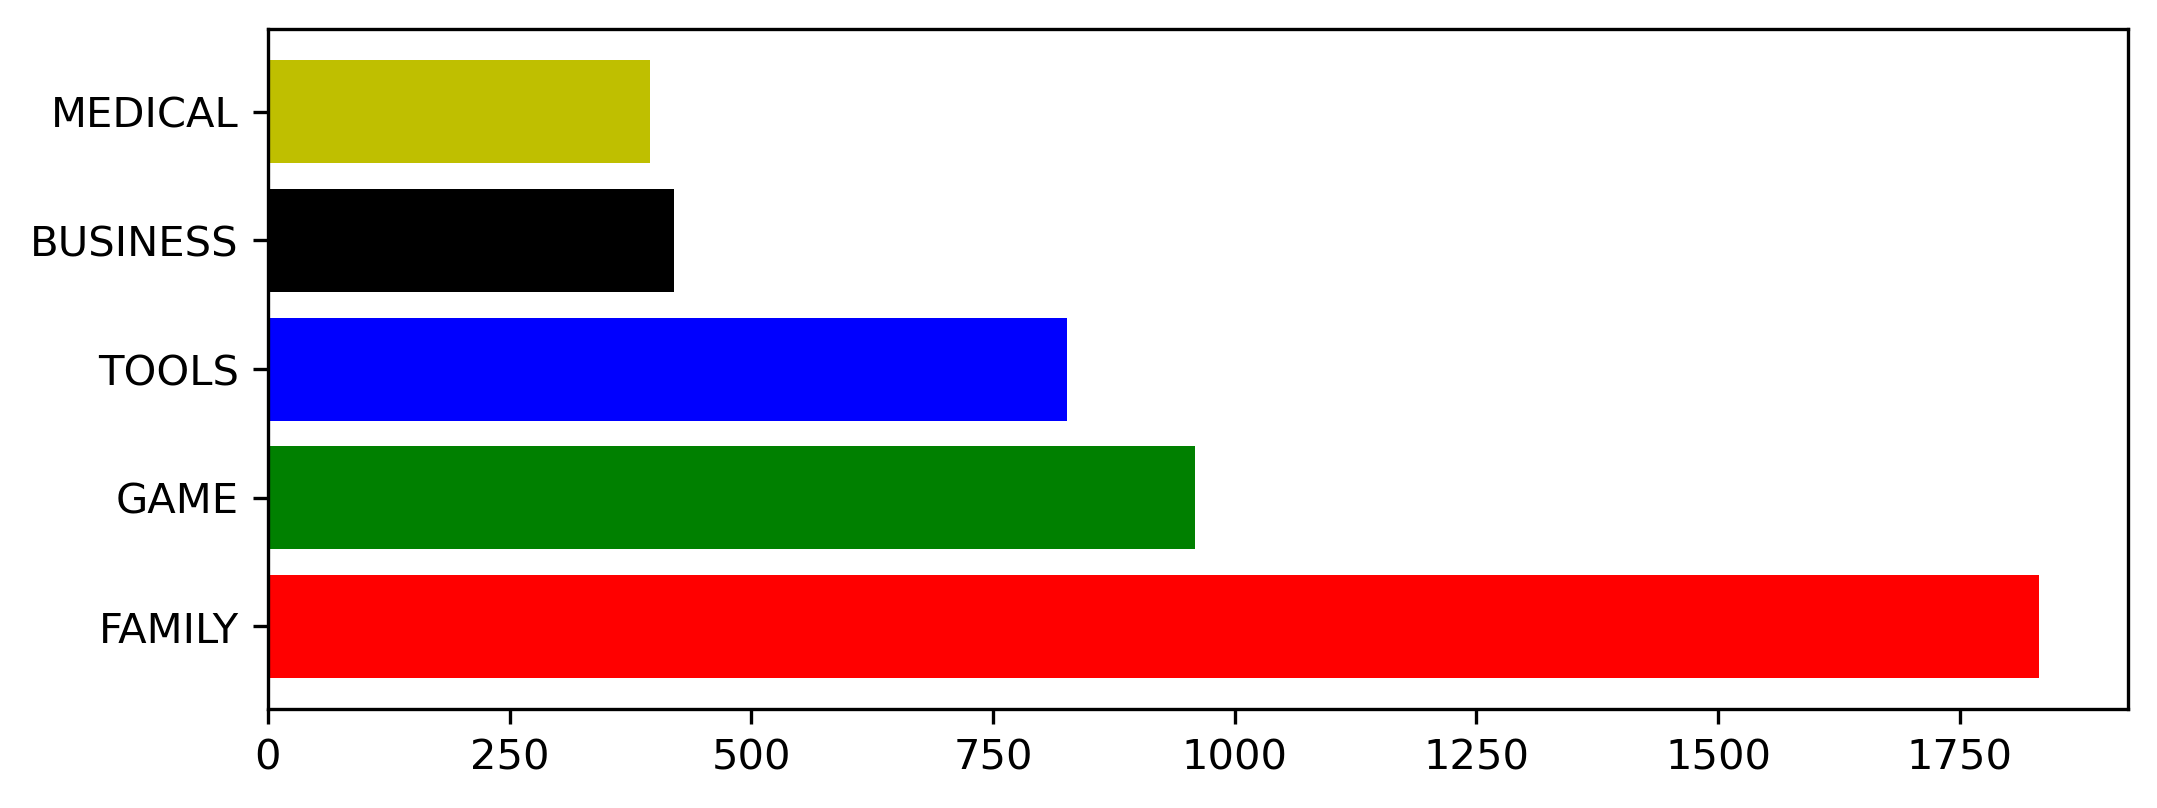

In [25]:
cat_order = df2.groupby('Category').agg({
    'App' : 'count'
        }).rename({'App':'Total'}, axis=1).sort_values(by = 'Total', ascending = False).head()
X = cat_order.index
Y = cat_order['Total']
my_colors = 'rgbkymc'
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
plt.barh(X,Y, color=my_colors)

In [26]:
cat_order

,Total
Category,
FAMILY,1832
GAME,959
TOOLS,827
BUSINESS,420
MEDICAL,395


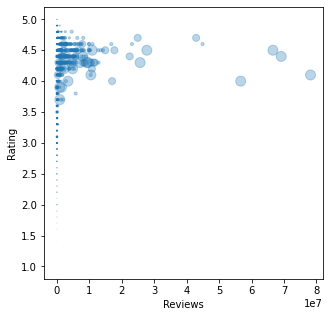

In [27]:
X = df2['Reviews'].values # axis x
Y = df2['Rating'].values # axis y
area = playstore['Installs'].values/10000000 # ukuran besar/kecilnya lingkaran scatter plot
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.scatter(x=X,y=Y, s=area, alpha=0.3)
plt.xlabel('Reviews')
plt.ylabel('Rating')
plt.savefig('rev_rat.png',bbox_inches="tight")


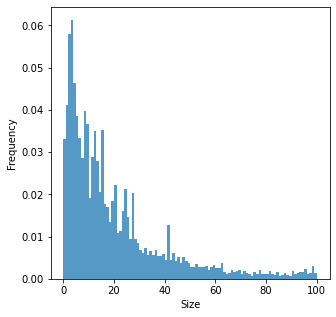

In [28]:
X=(playstore['Size']/1000000).values
fig = plt.figure(figsize=(5,5))
fig.add_subplot()
plt.hist(X,bins=100, density=True,  alpha=0.75)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.savefig('hist_size.png',bbox_inches="tight")

figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())
result3 = str(figdata_png)[2:-1]

<ipython-input-29-06c92bb5d091>:9: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh(X,Y, color=my_colors)
<ipython-input-29-06c92bb5d091>:12: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh('Category','Total', color=my_colors)


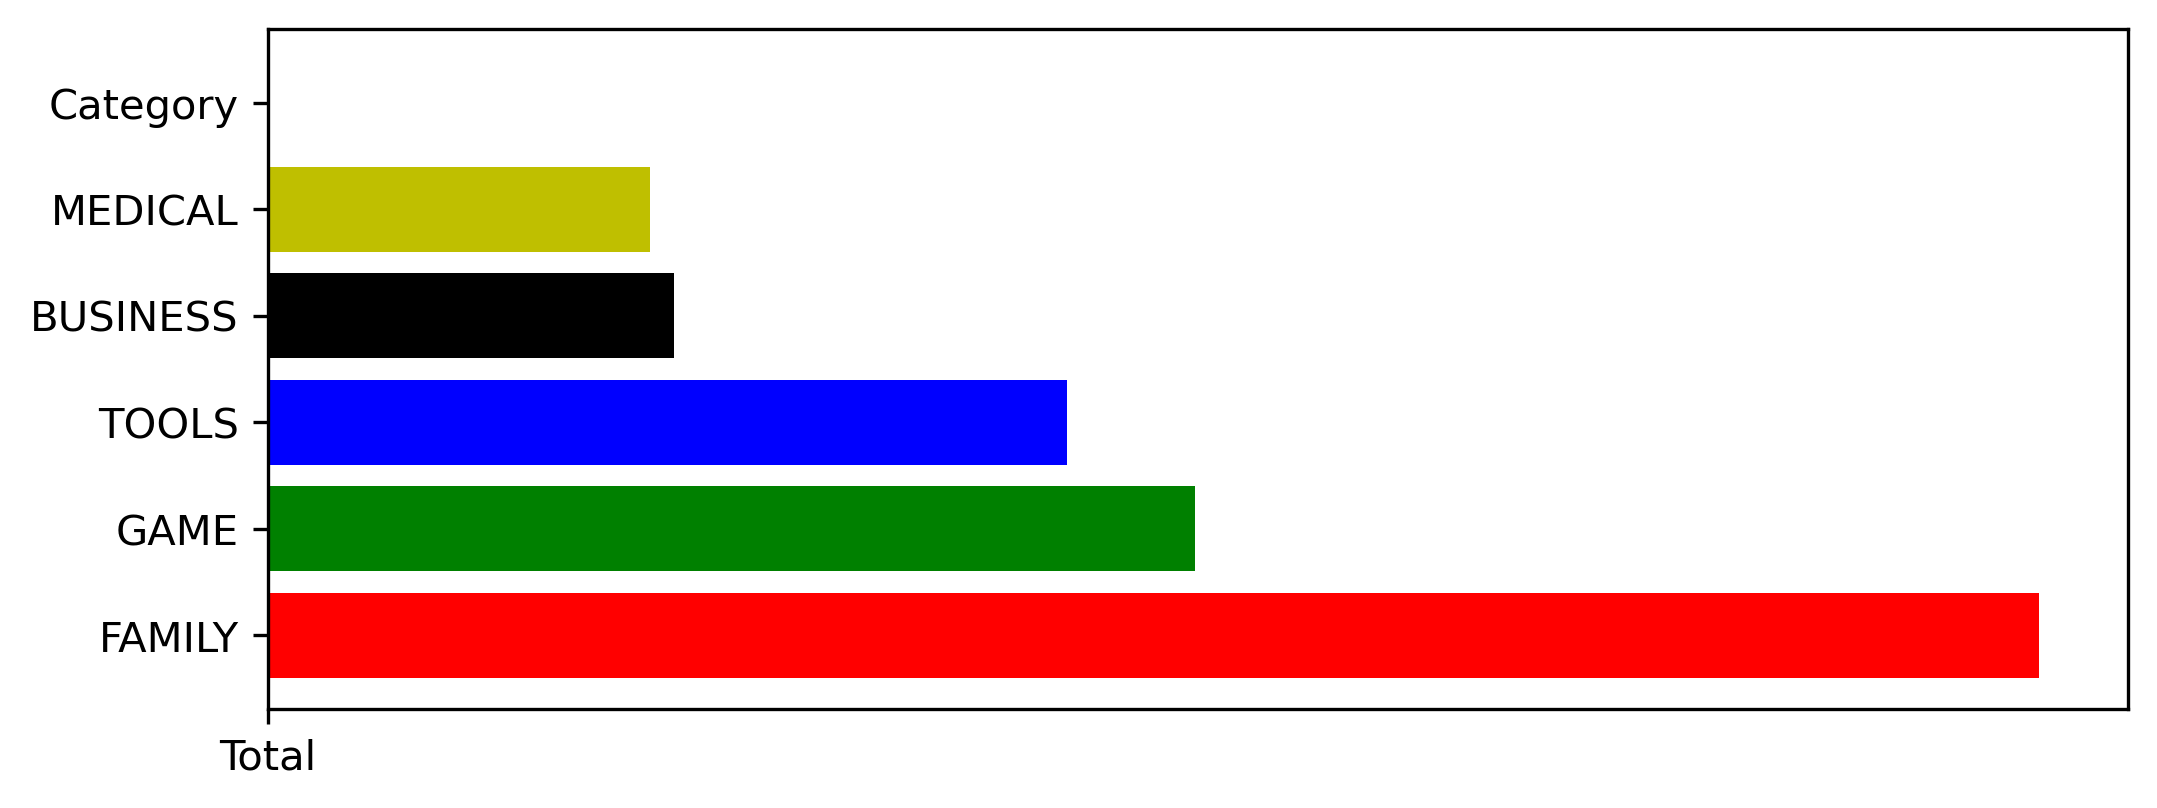

In [29]:
cat_order = df2.groupby('Category').agg({
    'App' : 'count'
        }).rename({'App':'Total'}, axis=1).sort_values(by = 'Total', ascending = False).head()
X = cat_order.index
Y = cat_order['Total']
my_colors = 'rgbkymc'
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
plt.barh(X,Y, color=my_colors)
# bagian ini digunakan untuk membuat bar plot
# isi variabel x dan y yang telah di definisikan di atas
plt.barh('Category','Total', color=my_colors)
# bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order.png',bbox_inches="tight")
# bagian ini digunakan untuk mengconvert matplotlib png ke base64 agar dapat ditampilkan ke template html
figfile = BytesIO()
plt.savefig(figfile, format='png')
figfile.seek(0)
figdata_png = base64.b64encode(figfile.getvalue())
# variabel result akan dimasukkan ke dalam parameter di fungsi render_template() agar dapat ditampilkan di 
# halaman html
result = str(figdata_png)[2:-1]
    

<ipython-input-30-8f85f74a95ce>:12: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.barh('Category','Total', color=my_colors)


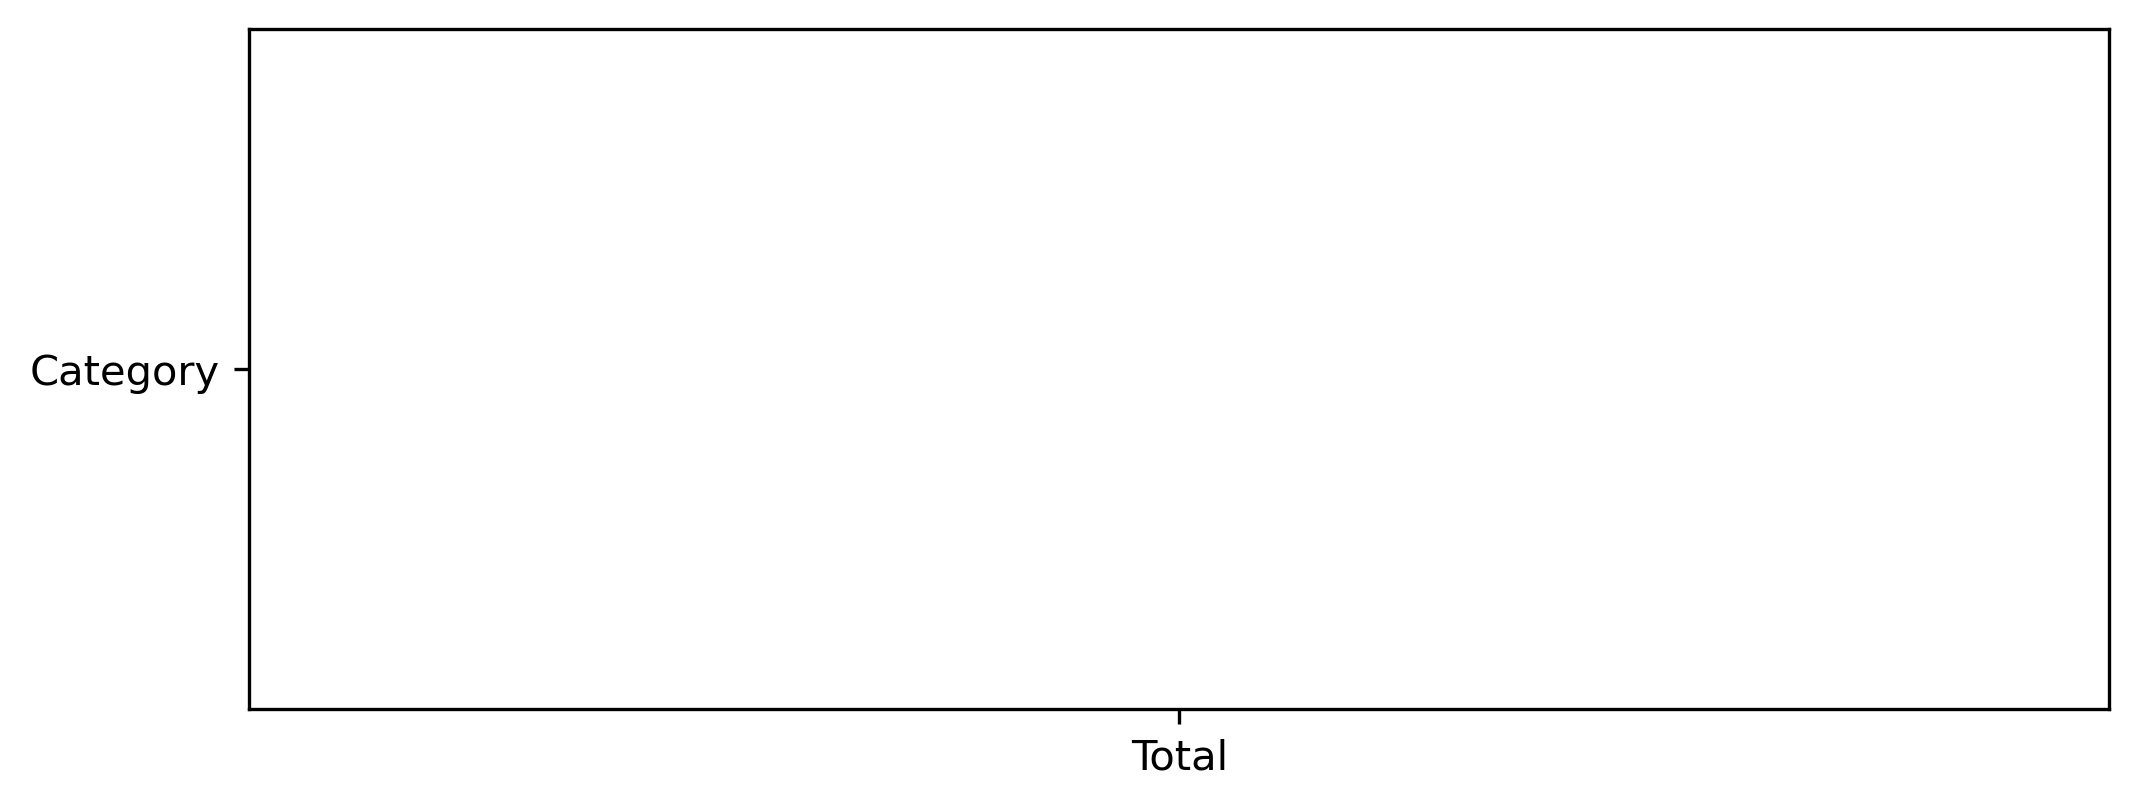

In [30]:
cat_order = df2.groupby('Category').agg({
'App' : 'count'
        }).rename({'App':'Total'}, axis=1).sort_values(by = 'Total', ascending = False).head()
X = cat_order.index
Y = cat_order['Total']
my_colors = 'rgbkymc'
    # bagian ini digunakan untuk membuat kanvas/figure
fig = plt.figure(figsize=(8,3),dpi=300)
fig.add_subplot()
    # bagian ini digunakan untuk membuat bar plot
    # isi variabel x dan y yang telah di definisikan di atas
plt.barh('Category','Total', color=my_colors)
    # bagian ini digunakan untuk menyimpan plot dalam format image.png
plt.savefig('cat_order.png',bbox_inches="tight")